## ID : 816000325
## Name: Ajay Sieunarine
## Email: ajay.sieunarine@my.uwi.edu
## Repo: https://github.com/jefroy/big-data-A4

In [259]:
# math and graph stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# text analysis stuff
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import string
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from string import punctuation

# ML stuff
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score
from sklearn import svm
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

# utility stuff
from sklearn.utils import shuffle
from itertools import chain
from sklearn.preprocessing import LabelEncoder

# more graph stuff
%matplotlib inline
plt.style.use('dark_background') # turn off for light theme
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sep = '============================================================================================'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\idisc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\idisc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Warm Up (20 marks) 

In [237]:
# documents/sentences
corpus = [ 
    'Apple Orange Orange Apple',
    'Apple Banana Apple Banana',
    'Banana Apple Banana Banana Banana Apple',
    'Banana Orange Banana Banana Orange Banana',
    'Banana Apple Banana Banana Orange Banana'
]

def corp2vec(corpus):
    '''
    This function converts a document to a vector showing its term frequencies.
    Each column represents a term in the corpus. (in this case, there are 3 terms).
    Uses CountVectorizer() as a model.
    '''
    tf_vectorizer = CountVectorizer() # model
    tf = tf_vectorizer.fit_transform(corpus) # get term frequencies
    return tf.A # return the array representation

print(type(corp2vec(corpus)))
print(corp2vec(corpus))

<class 'numpy.ndarray'>
[[2 0 2]
 [2 2 0]
 [2 4 0]
 [0 4 2]
 [1 4 1]]


# Preprocessing and Data Organization (20 marks) 

In [238]:
df = pd.read_csv('MrTrumpSpeeches.csv', sep='~', encoding="ISO-8859-1")

# remove this line please
# df = df[:10]

print(df.shape)
df.head()

(836, 9)


,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...


In [239]:
df.dtypes

id                 object
playlist           object
upload_date         int64
title              object
view_count        float64
average_rating    float64
like_count        float64
dislike_count     float64
subtitles          object
dtype: object

## Task 1: 
Create a new column in the dataframe called 'sentiment'. Using appropriate existing columns, populate the new column with 0's and 1's where 0 refers to a negative sentiment and 1 refers to a positive sentiment. 

- using the `average_rating` column, find the average score
    * ratings above or equal to this average are denoted by sentiment = 1
    * ratings under this average are denoted by sentiment = 0

In [240]:
# find the avg/mid score possible:
max_score = max(df['average_rating'])
min_score = min(df['average_rating'])
avg_score = (max_score + min_score) / 2
print(max_score)
print(min_score)
print(avg_score)

5.0
1.34782612324
3.17391306162


In [241]:
def pruneRating(x):
    '''
    utility function for lambda
    returns 1 for good/avg rating
    returns 0 for bad rating
    '''
    if x >= avg_score:
        return 1
    if x < avg_score:
        return 0

df['sentiment'] = df['average_rating'].apply(
    lambda x: pruneRating(x)
)

enc3 = LabelEncoder()
enc3.fit(df['sentiment'])

print(enc3.classes_)
print(sep)
print(df['sentiment'].describe()) 
print(sep)
df.head()

[0 1]
count    836.000000
mean       0.903110
std        0.295985
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sentiment, dtype: float64


,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,sentiment
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,1
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,1
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,1
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,1
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,1


## Task 2
- Clean the subtitles data and store the cleaned text in a new column 'subtitle_clean'.
    * For each step of your text cleaning give a brief explanation of why you chose to perform that method on the text. 

In [242]:
# this block of code will take a little while to process since the text is being thoroughly cleaned.
wnl = WordNetLemmatizer()
porter = PorterStemmer()
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation.
    2. Remove all stopwords.
    4. Convert all remaining words to lowercase.
        - if the string has numbers in it, discard it.
    5. Lemmatize.
    6. Convert to the stem of the word.
    7. Returns a list of the cleaned text.
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # convert all words to lowercase and lemmatize and stem
    
    arr = []
    for word in words:
        word = word.lower()
        word = porter.stem(word)
        word = wnl.lemmatize(word)
        if word.isalpha():
            word += ' '
            arr.append(word)
        
    arr = ''.join(arr) # convert the array of words/tokens into a string
#     print(arr,sep)
    if len(arr) > 0:
        return arr
    else:
        return "smeckledorf" # if the entire subtitle had no words in it.

def test_text_process():
    '''
    function to hold some test cases to ensure the lambda function does its job
    '''
    print(
        'Test stopwords and lowercase:\nHI I AM A STOPWORD = ', 
        text_process("HI I AM A STOPWORD")
    )
    print(sep)
    print(
        'Test Stemming words and removing punctuation:\nfishing, fisher, fished = ', 
        text_process("fishing, fisher , fished")
    )

def pruneSubtitle(x):
    '''
    utility function for lambda
    x - string from `subtitles` col
    '''
    return text_process(x)

# test_text_process()

df['subtitle_clean'] = df['subtitles'].apply(
    lambda x: pruneSubtitle(x)
)

df.head()

,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,sentiment,subtitle_clean
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,1,presid unit state mr go trapp famili thank app...
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,1,offici tuesday novemb ever think youd hear maj...
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,1,music music music great countri leader free un...
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,1,welcom star presid music place live place wow ...
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,1,thank music great peopl granna three day go wi...


I chose to Lemmatize AND Stem each word since the amount of text being processed is very large, and this will also allow the models to get better results.

## Task 3
Use TFIDFVectorizer and CountVectorizer to encode the cleaned subtitles. 

In [243]:
# # define the data to use
clean_subs = list(df['subtitle_clean']) 
# clean_subs = list(df['subtitle_clean']) # this line might be crashing the file 
# # clean_subs = df['subtitle_clean'].values # kinda pointless, parsing as list() is neater
# # jupyter might require more memory to run this

print(type(clean_subs))
print(sep)
print(len(clean_subs))

<class 'list'>
836


In [244]:
# CountVectorizer
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(clean_subs)
print("CountVectorizer:")
print(tf)
print(sep)
print(tf_vectorizer.get_feature_names())

CountVectorizer:
  (0, 10152)	3
  (0, 13924)	2
  (0, 12460)	4
  (0, 8565)	2
  (0, 5403)	62
  (0, 13495)	1
  (0, 4554)	6
  (0, 13116)	16
  (0, 619)	7
  (0, 8620)	6
  (0, 4361)	3
  (0, 14519)	9
  (0, 14407)	16
  (0, 1140)	2
  (0, 9683)	24
  (0, 12271)	7
  (0, 1977)	7
  (0, 12301)	5
  (0, 7173)	10
  (0, 5310)	11
  (0, 7614)	1
  (0, 1492)	1
  (0, 7316)	3
  (0, 14499)	3
  (0, 9877)	3
  :	:
  (835, 9234)	1
  (835, 5594)	1
  (835, 5192)	1
  (835, 3192)	1
  (835, 8545)	1
  (835, 9450)	1
  (835, 14605)	1
  (835, 12309)	1
  (835, 14390)	1
  (835, 4727)	1
  (835, 12113)	1
  (835, 13300)	1
  (835, 12915)	1
  (835, 14421)	1
  (835, 11955)	1
  (835, 12360)	1
  (835, 1655)	1
  (835, 6046)	2
  (835, 1599)	1
  (835, 10379)	1
  (835, 9162)	1
  (835, 7976)	1
  (835, 14036)	1
  (835, 14578)	1
  (835, 9001)	1
['aah', 'aaron', 'ab', 'aback', 'abaddon', 'abama', 'abandon', 'abat', 'abba', 'abbey', 'abbi', 'abbot', 'abc', 'abdallah', 'abduct', 'abdul', 'abdulaziz', 'abdullah', 'abe', 'abedin', 'aberdeen', 'ab

In [245]:
# TFIDF 
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(clean_subs)
print("TFIDF:")
print(tfidf)
print(sep)
print(tfidf_vec.get_feature_names())

TFIDF:
  (0, 7486)	0.04751205147799466
  (0, 5962)	0.011326455170446947
  (0, 8794)	0.051128536589619536
  (0, 10050)	0.017727621150160796
  (0, 7127)	0.013401604985027887
  (0, 5560)	0.03751860862489499
  (0, 8229)	0.01524322982417649
  (0, 5651)	0.01524322982417649
  (0, 5477)	0.01629221174807671
  (0, 13692)	0.009848201417937272
  (0, 14595)	0.013130721163506597
  (0, 4350)	0.026073154100270227
  (0, 14728)	0.011517603639049308
  (0, 8055)	0.013130721163506597
  (0, 14550)	0.022747491274833234
  (0, 13136)	0.1378572939353654
  (0, 7234)	0.028093099934258476
  (0, 591)	0.03662090696140283
  (0, 3095)	0.028657662201300227
  (0, 6143)	0.016623917442992395
  (0, 8559)	0.04475267227581382
  (0, 12569)	0.013192290834575914
  (0, 2873)	0.01655628170074303
  (0, 2527)	0.026209098588279897
  (0, 7845)	0.04375087064314803
  :	:
  (835, 11441)	0.06263014500554266
  (835, 11053)	0.009706425773658559
  (835, 5444)	0.01622395738546941
  (835, 1916)	0.02560363678540844
  (835, 8798)	0.038339720515

## Text Classification (30 marks) 

### Task 1
When choosing a metric to access the performance of your classifier provide a brief explanation of why you chose that metric.

Overall, both methods are good supervised machine learning classification methods.

- Logistic Regression:
    * very good option since the target varaible (sentiment column) is binary (0,1).
    * the encoded data from TF and TFIDF supply good values.

- SVM:
    * also good at solving regression problems like this.
    * similar to logistic regression as a model, it also excels at solving a non-probabilistic binary problem.
    

## Task 2
Perform the following classification experiments keeping track of the performance of each classification task for future use: 
1. Logistic regression model on word count 
2. Logistic regression model on TFIDF 
3. Logistic regression model on TFIDF + ngram 
4. Support Vector Machine model on word count 
5. Support Vector Machine model on TFIDF 
6. Support Vector Machine model on TFIDF + ngram

In [246]:
def text_fit(X, y, model, clf_model):
    """
    X - data
    y - target variables
    model - model for the word processing, tfidf, countvectorization etc
    clf_model - classification algorithm, classifier (in this case, logistic regression)
    coef_show - show the top coeefs if true (1)
    """
    X_c = model.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
#     print('type(X_c): ', type(X_c)) # sparse matrix
    print('# features: {}'.format(X_c.shape[1]))
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    print('Model Recall: {}'.format(recall))
    print('Model Accuracy: {}'.format(acc))
    
    return recall, acc

In [247]:
df = df[df['average_rating'] != avg_score] # remove mean values so the classifiers give more meaningful predictions
X = df['subtitle_clean'] # data
y = df['sentiment'] # target variable

c = CountVectorizer()
tfidf = TfidfVectorizer()

In [248]:
X.head()

0    presid unit state mr go trapp famili thank app...
1    offici tuesday novemb ever think youd hear maj...
2    music music music great countri leader free un...
3    welcom star presid music place live place wow ...
4    thank music great peopl granna three day go wi...
Name: subtitle_clean, dtype: object

In [249]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: sentiment, dtype: int64

In [250]:
# Logistic regression and SVM models on word count (tf)
recall_LR_tf, acc_LR_tf = text_fit(X, y, c, LogisticRegression())
print(sep)
recall_SVM_tf, acc_SVM_tf = text_fit(X, y, c, LinearSVC())

C:\Users\idisc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# features: 14928
# train records: 627
# test records: 209
Model Recall: 0.9583333333333334
Model Accuracy: 0.8947368421052632
# features: 14928
# train records: 627
# test records: 209
Model Recall: 0.9427083333333334
Model Accuracy: 0.8899521531100478


In [251]:
# Logistic regression and SVM on tfidf
recall_LR_tfidf, acc_LR_tfidf = text_fit(X, y, tfidf, LogisticRegression())
print(sep)
recall_SVM_tfidf, acc_SVM_tfidf = text_fit(X, y, tfidf, LinearSVC())

# features: 14928
# train records: 627
# test records: 209
Model Recall: 1.0
Model Accuracy: 0.9186602870813397
# features: 14928
# train records: 627
# test records: 209
Model Recall: 0.9895833333333334
Model Accuracy: 0.9138755980861244


In [252]:
# Logistic regression and SVM on tfidf and ngram
recall_LR_tfidf_ngram, acc_LR_tfidf_ngram = text_fit(X, y, TfidfVectorizer(ngram_range=(1,2)), LogisticRegression())
print(sep)
recall_SVM_tfidf_ngram, acc_SVM_tfidf_ngram = text_fit(X, y, TfidfVectorizer(ngram_range=(1,2)), LinearSVC())

# features: 364894
# train records: 627
# test records: 209
Model Recall: 1.0
Model Accuracy: 0.9186602870813397
# features: 364894
# train records: 627
# test records: 209
Model Recall: 0.9947916666666666
Model Accuracy: 0.9186602870813397


In [257]:
models = pd.DataFrame({
    'Model': [
        'LR on TF', 'SVM on TF',
        'LR on TFIDF', 'SVM on TFIDF',
        'LR on TFIDF w/ Ngram=2', 'SVM on TFIDF w/ Ngram=2'
    ],
    'Recall': [
        recall_LR_tf, recall_SVM_tf,
        recall_LR_tfidf, recall_SVM_tfidf,
        recall_LR_tfidf_ngram, recall_SVM_tfidf_ngram
    ],
    'Accuracy': [
        acc_LR_tf, acc_SVM_tf,
        acc_LR_tfidf, acc_SVM_tfidf,
        acc_LR_tfidf_ngram, acc_SVM_tfidf_ngram
    ],
})

models.sort_values(by='Accuracy', ascending=False)

,Model,Recall,Accuracy
2,LR on TFIDF,1.000000,0.918660
4,LR on TFIDF w/ Ngram=2,1.000000,0.918660
5,SVM on TFIDF w/ Ngram=2,0.994792,0.918660
3,SVM on TFIDF,0.989583,0.913876
0,LR on TF,0.958333,0.894737
1,SVM on TF,0.942708,0.889952


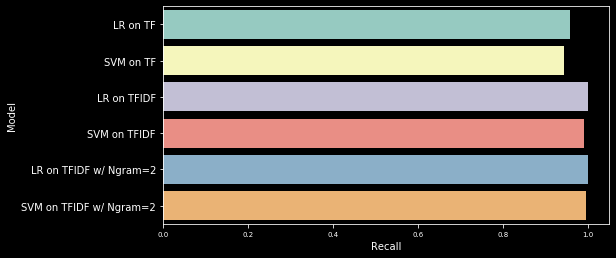

In [261]:
sns.barplot(x='Recall', y='Model', data=models)

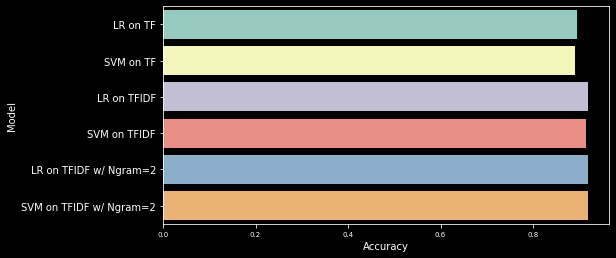

In [263]:
sns.barplot(x='Accuracy', y='Model', data=models)

As we can see, both models are performing very well on the data while using both text classifiers.